<a href="https://colab.research.google.com/github/MuhammadShavaiz/pytorch-google-colab/blob/main/1_classification_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import torch
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_circles
import pandas as pd
from sklearn.model_selection import train_test_split

In [155]:
n_samples = 1000
X,y = make_circles(n_samples, noise = 0.03, random_state = 43)


In [156]:
circles = pd.DataFrame({'X1' : X[:,0],
                       'X2' : X[:,1],
                       'Label' : y})
circles.head(10)

,X1,X2,Label
0,-0.124570,-0.785914,1
1,0.772370,-0.158252,1
2,-0.657123,0.768114,0
3,0.794009,0.051699,1
4,-0.642243,0.361384,1
5,-0.575683,0.575777,1
6,0.192506,0.735576,1
7,-0.257459,0.763777,1
8,0.766678,-0.601449,0
9,0.101182,-0.799364,1


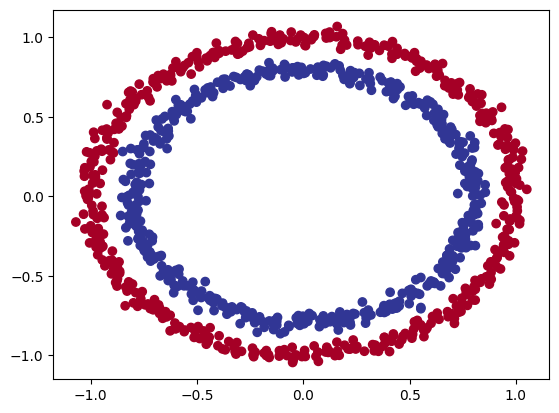

In [157]:
plt.scatter(X[:,0], X[:,1], c = y, cmap = plt.cm.RdYlBu)

In [158]:
X_sample = X[0]
y_sample = y[0]
print(X_sample, y_sample)

[-0.12457009 -0.78591392] 1


In [159]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
X[:5], y[:5]

(tensor([[-0.1246, -0.7859],
         [ 0.7724, -0.1583],
         [-0.6571,  0.7681],
         [ 0.7940,  0.0517],
         [-0.6422,  0.3614]]),
 tensor([1., 1., 0., 1., 1.]))

In [160]:
type(X), type(y), X.dtype, y.dtype

(torch.Tensor, torch.Tensor, torch.float32, torch.float32)

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [162]:
from torch import nn

In [163]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [164]:
class CircleModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 1)
    self.ReLU = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.ReLU(self.layer_2(self.ReLU(self.layer_1(x)))))
model_0 = CircleModel().to(device)

```nn.Sequential(
  nn.Linear(in , out),
  nn.Linear(in, out)
)```
same as above, easy to write but individual layers are also useful to learn in case we want specific changes in a layer.

In [165]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.1)

In [166]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
epochs = 100
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
for epoch in range(epochs):
  model_0.train()
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))
  loss = loss_fn(y_logits, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_0.eval()
  with torch.inference_mode():
    y_test_logits = model_0(X_test).squeeze()
    y_test_pred = torch.round(torch.sigmoid(y_test_logits))
    test_loss = loss_fn(y_test_logits, y_test)
  if epoch % 10 == 0:
    print(f'training loss{loss} test loss{test_loss}')


training loss0.6929727792739868 test loss0.6932692527770996
training loss0.6924148201942444 test loss0.69294273853302
training loss0.6921736001968384 test loss0.6927716135978699
training loss0.692005455493927 test loss0.6926278471946716
training loss0.6918473839759827 test loss0.6924858093261719
training loss0.6916893124580383 test loss0.692351758480072
training loss0.6915266513824463 test loss0.6922264695167542
training loss0.6913679242134094 test loss0.6921032667160034
training loss0.6912169456481934 test loss0.6919839382171631
training loss0.6910675168037415 test loss0.6918722987174988


#**working with multiclass**



In [167]:
import torch
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

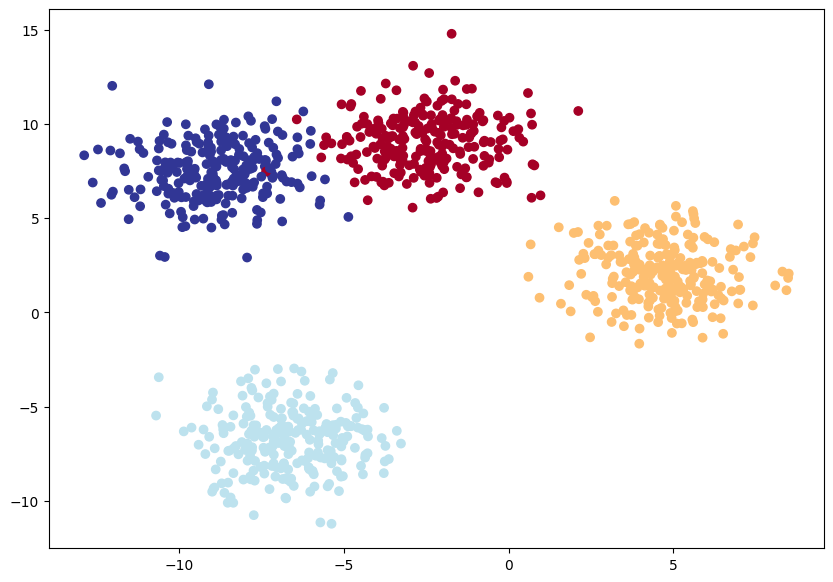

In [168]:
X_blob, y_blob = make_blobs(n_samples = 1000,
                                    n_features = 2,
                                    centers = 4,
                                    cluster_std = 1.5,
                                    random_state = 42)
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob, y_blob, test_size = 0.2, random_state = 42)
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:,0], X_blob[:,1], c = y_blob, cmap = plt.cm.RdYlBu)


In [169]:
device = 'cuda' if torch.cuda.is_available else 'cpu'

In [170]:
class MultiClassClassifier(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 4)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
model_1 = MultiClassClassifier().to(device)

In [171]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model_1.parameters(), lr = 0.1)

In [172]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)
X_blob_train, X_blob_test  = X_blob_train.to(device), X_blob_test.to(device)
y_blob_train, y_blob_test = y_blob_train.to(device), y_blob_test.to(device)
epochs = 100
for epoch in range(epochs):
  model_1.train()
  y_blob_logits = model_1(X_blob_train)
  y_blob_predictions = torch.softmax(y_blob_logits, dim = 1).argmax(dim = 1)
  loss = loss_fn(y_blob_logits, y_blob_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  model_1.eval()
  with torch.inference_mode():
    test_blob_logits = model_1(X_blob_test)
    test_blob_predictions = torch.softmax(test_blob_logits, dim = 1).argmax(dim = 1)
    loss_test = loss_fn(test_blob_logits, y_blob_test)
  if epoch % 10 == 0:
    print(f"epoch: {epoch} train_loss: {loss} test_loss: {loss_test}")

epoch: 0 train_loss: 1.5086677074432373 test_loss: 1.4292956590652466
epoch: 10 train_loss: 0.03310168534517288 test_loss: 0.02736903913319111
epoch: 20 train_loss: 0.03343653678894043 test_loss: 0.010780193842947483
epoch: 30 train_loss: 0.027118638157844543 test_loss: 0.012019294314086437
epoch: 40 train_loss: 0.021454118192195892 test_loss: 0.016128359362483025
epoch: 50 train_loss: 0.032571788877248764 test_loss: 0.04603035748004913
epoch: 60 train_loss: 0.02772950567305088 test_loss: 0.004981836304068565
epoch: 70 train_loss: 0.02182854898273945 test_loss: 0.009217091836035252
epoch: 80 train_loss: 0.0181584469974041 test_loss: 0.0031706520821899176
epoch: 90 train_loss: 0.017402974888682365 test_loss: 0.003782101906836033
